# Bicep Generation for architecture diagram

Under this scenario, a score from 0-10, with 10 being closest match, is generated comparing a baseline response against an actual response.

In [1]:
import common
import os
from PIL import Image
import requests
from io import BytesIO


In [3]:
# Get a configured model
client = common.get_openai_client(
        api_key=common.api_KEY,
        api_version=common.api_version,
        azure_endpoint=common.api_URI)

In [11]:
def call_openai(url:str, prompt:str, max_tokens=1000, temperature=0.2):
    response = client.chat.completions.create(
            model=common.gpt_api_deployment,
            messages=[
                {
                "role": "system",
                "content": "You are a helpful assistant can help generate Bicep code from diagrams."
                },
                {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                    "type": "image_url",
                    "image_url": {
                        "url": url,
                        "detail": "high"
                    },
                    },
                ],
                }
            ],
            max_tokens=max_tokens,
            temperature=temperature
        )
    return str(response.choices[0].message.content)

In [12]:
def split_sentence(sentence, line_length=120):
    words = sentence.split()
    lines = []
    current_line = ''
    for word in words:
        if len(current_line) + len(word) + 1 > line_length:
            lines.append(current_line)
            current_line = word
        else:
            current_line = current_line + ' ' + word if current_line else word
    lines.append(current_line)
    for line in lines:
        print(line)
    #return lines

In [13]:
def get_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((img.width, img.height))
    return img


In [14]:
url = "https://alemoraoaist.z13.web.core.windows.net/images/architecture-diagram.png"

In [15]:
def full_process(url, question):
    print("Image:")
    get_image(url).show()
    print("User:")
    split_sentence(question)
    print("\nAssistant:")
    ans = call_openai(url, question)
    print(ans)

Image:


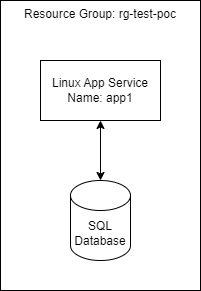

User:
Describe what is in the image.

Assistant:
The image is a simple diagram representing a cloud infrastructure setup. It includes the following components:

1. Resource Group: There is a resource group labeled "rg-test-poc" which is a container that holds related resources for an Azure solution.

2. Linux App Service: Within the resource group, there is a Linux App Service with the name "app1". This represents a managed hosting environment for deploying and running web applications on Linux.

3. SQL Database: Below the Linux App Service, there is a SQL Database. The diagram shows an arrow pointing from the Linux App Service to the SQL Database, indicating that the app service is connected to or depends on the SQL Database.

The diagram does not provide specific details such as the region, size, or configuration of the resources. It simply outlines the relationship between a Linux App Service and a SQL Database within a resource group.


In [16]:
question = "Describe what is in the image."
full_process(url, question)

Image:


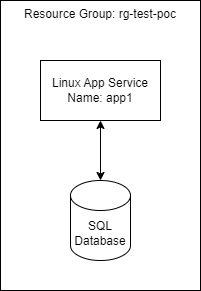

User:
Generate the Bicep code to implement the architecture in the diagram. Write the code only. Do not provide comments or
explanations.

Assistant:
```bicep
resource appServicePlan 'Microsoft.Web/serverfarms@2021-02-01' = {
  name: 'appServicePlan1'
  location: resourceGroup().location
  sku: {
    name: 'P1v2'
    tier: 'PremiumV2'
  }
  kind: 'linux'
  properties: {
    reserved: true
  }
}

resource appService 'Microsoft.Web/sites@2021-02-01' = {
  name: 'app1'
  location: resourceGroup().location
  kind: 'app'
  properties: {
    serverFarmId: appServicePlan.id
  }
}

resource sqlServer 'Microsoft.Sql/servers@2021-05-01-preview' = {
  name: 'sqlServer1'
  location: resourceGroup().location
  properties: {
    administratorLogin: 'sqladmin'
    administratorLoginPassword: 'Password#1234'
    version: '12.0'
  }
}

resource sqlDatabase 'Microsoft.Sql/servers/databases@2021-05-01-preview' = {
  name: 'sqlServer1/sqlDatabase1'
  location: resourceGroup().location
  properties: {
    

In [10]:

question = "Generate the Bicep code to implement the architecture in the diagram. Write the code only. Do not provide comments or explanations."
full_process(url, question)
